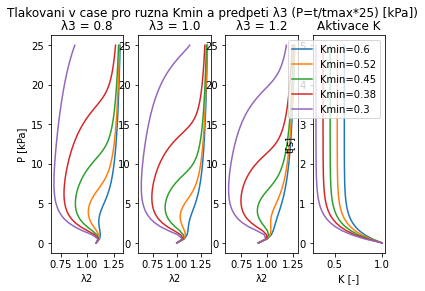

In [1]:
from scipy.optimize import fsolve
from sympy import symbols, exp, sin, cos, diff
import math
import numpy as np
import matplotlib.pyplot as plt

# 8R - nejpodobnejsi tenkostenne nadobe
gamma = math.radians(42.71) #[rad]
R = 3.44
H = 3.76-R
c0 = 11.23
c11 = 6.12
c12 = 14.17
c21 = 12.71
c22 = 6.61
c31 = 9.27
c41 = 9.27
c32 = 16.16
c42 = 16.16

l1s, l2s, l3s = symbols('l1s, l2s, l3s')
Ic = l1s**2+l2s**2+l3s**2
I14 = l3s**2
I24 = l2s**2
I34 = (l3s**2)*(cos(gamma))**2+(l2s**2)*(sin(gamma))**2
I44 = (l3s**2)*(cos(gamma))**2+(l2s**2)*(sin(gamma))**2
Wp = (c0/2)*(Ic-3)+ (c11/(4*c12))*(exp(c12*(I14-1)**2)-1)+ (c21/(4*c22))*(exp(c22*(I24-1)**2)-1)+ (c31/(4*c32))*(exp(c32*(I34-1)**2)-1)+ (c41/(4*c42))*(exp(c42*(I44-1)**2)-1)
dWp_l1s = diff(Wp,l1s)
dWp_l2s = diff(Wp,l2s)
dWp_l3s = diff(Wp,l3s)

alfa = 3
t_min = 0
t_max = 5
Nt = 50
K_max = 0.6
K_min = 0.3
Nk = 5
l3_min = 0.8
l3_max = 1.2
Nl3 = 3
Pmax = 25

def eq1(l2, l3, P, t, K_min):
    Ca_max = 40

    fi_p = 0.6
    fi_a = 0.4

    Ca = Ca_max * (1 - math.exp(-alfa * t))
    K = 1 - (1 - K_min) * (1 - math.exp(-alfa * t))
    l2_a = l2 / K
    l1 = 1/(l2*l3)
    dwp_l1 = dWp_l1s.subs(l1s,l1).subs(l2s,l2).subs(l3s,l3)
    dwp_l2 = dWp_l2s.subs(l1s,l1).subs(l2s,l2).subs(l3s,l3)
    dwa_l2a = Ca*(2*l2_a - 2)
    p = fi_p * l1 * dwp_l1
    r = l2*R
    h = l1*H
    s2 = (fi_p * l2 * dwp_l2 + fi_a * l2_a * dwa_l2a - p)

    return s2-P*r/h

def eq2(l2, l3, P, Fred):
    fi_p = 0.6

    l1 = 1/(l2*l3)
    dwp_l1 = dWp_l1s.subs(l1s,l1).subs(l2s,l2).subs(l3s,l3)
    dwp_l3 = dWp_l3s.subs(l1s,l1).subs(l2s,l2).subs(l3s,l3)
    p = fi_p * l1 * dwp_l1
    r = l2*R
    h = l1*H
    s3 = fi_p * l3 * dwp_l3 - p

    return s3-Fred/(2*math.pi*r*h)-r*P/(2*h)


Kmin = np.linspace(K_max,K_min,num=Nk)
t = np.linspace(t_min,t_max,num=Nt)
l3 = np.linspace(l3_min,l3_max,num=Nl3)

P = np.zeros(Nt)
Kval = np.zeros((Nk,Nt,1))
ii = 0
for i in t:
    P[ii] = i*Pmax/t_max
    # P[ii] = 9+9*math.cos(2*math.pi*i-math.pi)
    # P[ii] = 14 + 4 * math.cos(2 * math.pi * i - math.pi)
    ii += 1
root = np.zeros((Nl3,Nk,Nt,2))
jj = 0
kk = 0
ll = 0
for l in l3:
    for k in Kmin:
        for j in t:
            def fun_root(x):
                return [eq1(x[0],l,P[jj],j,k),
                        eq2(x[0],l,P[jj],x[1])]

            root[ll,kk,jj,:] = fsolve(fun_root, [1.3, -50])
            Kval[kk,jj] = 1 - (1 - k) * (1 - math.exp(-alfa * j))
            jj += 1
        jj = jj-Nt
        kk += 1
    ll += 1
    kk = kk-Nk




#prvni graf, vodorovna osa cas t
# fig, axs = plt.subplots(Nl3+1)
# fig.suptitle('Tlakovani v case pro ruzna Kmin a predpeti λ3 (P=14+4*sin(2pi*t-pi) [kPa], alfa='+str(alfa)+')')
# for j in range(Nl3):
#     for i in range(Nk):
#         axs[j].plot(t,root[j,i,:,0], label="Kmin="+str(round(Kmin[i],2))) #+str(Kmin[i])+
#         axs[0].legend(bbox_to_anchor=(1.1, 1.05))
#         axs[j].set_title('λ3='+str(round(l3[j],2)),rotation='vertical',x=-0.1,y=0.2)
#         axs[j].set(ylabel='λ2')
# #graf K
# for i in range(Nk):
#     axs[Nl3].plot(t,Kval[i,:])
#     axs[Nl3].set(xlabel='t[s]',ylabel='K')


#druhy graf, vodorovna osa deformace, svisla tlak
fig2, axs2 = plt.subplots(1,Nl3+1)
fig2.suptitle('Tlakovani v case pro ruzna Kmin a predpeti λ3 (P=t/tmax*'+str(Pmax)+ ') [kPa])')
for j in range(Nl3):
    for i in range(Nk):
        axs2[j].plot(root[j,i,:,0],P, label='Kmin='+str(Kmin[i]) )
        axs2[j].set_title('λ3 = '+str(l3[j]))
        axs2[j].set(xlabel='λ2')
        axs2[0].set(ylabel='P [kPa]')
for i in range(Nk):
    axs2[Nl3].plot(Kval[i,:],t, label='Kmin='+str(round(Kmin[i],2)))
    axs2[Nl3].set_title('Aktivace K')
    axs2[Nl3].legend(loc="upper right")
    axs2[Nl3].set(xlabel='K [-]', ylabel="t[s]")


plt.show()





# # model 10L ... nejpoddanejsi
# gamma = math.radians(44.81) #[rad]
# R = 2.24
# H = 2.66-R
# c0 = 30.1
# c11 = 13.73
# c12 = 0.16
# c21 = 8.16
# c22 = 0.47
# c31 = 3.17
# c41 = 3.17
# c32 = 1.20
# c42 = 1.20
